# Primerjava Covid 19 z gripo, vpliv ukrepov, vpliv povprečne starosti populacije države na smrtnost !

In [2]:
import pandas as pandas
import os
import sys
import json
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets      import Dropdown
from bqplot          import Lines, Figure, LinearScale, DateScale, Axis
from ipyleaflet      import Map, GeoJSON, WidgetControl
from ipywidgets import IntSlider, ColorPicker, ToggleButton
import numpy as np
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
%matplotlib inline
sys.path.append(os.getcwd() + '/modules')
from zansModule     import read_population_by_sex, get_sum_population_array, my_round, get_age_distribution_array
from zansModule     import draw_bar_chart_distribution, draw_bar_chart_mortality, death_count_country_year, month_deaths

from enejBModule    import test_enej
from jakaRModule    import test_jaka
from nikolajPModule import test_nikolaj
from rokSModule     import test_rok

# reading data from files
with open('../podatki/countries.geo.json') as f:
    countries = json.load(f)
pop_by_sex = read_population_by_sex()  

In [5]:
def display_data_for_country(country_name, year, show_bool):
    print("Država: " + country_name + "\nLeto: " + str(year))
    pop_data_set = get_sum_population_array(pop_by_sex, country_name)
    rounded_year = my_round(year)
    
    avg_age = float(pop_by_sex[(pop_by_sex['Region-Country'] == country_name) & (pop_by_sex["Date"] == rounded_year)]["avg_age"])
    this_year_pop = [i for i in pop_data_set if i[0] == rounded_year]
    avg_deaths = month_deaths(death_count_country_year(country_name, year))
    
    if type(avg_deaths[0]) is float:
        avg_deaths = int(avg_deaths[0]), int(avg_deaths[1])
    
    print("Populacija v tej državi leta {} je {:.2f} tisoč".format(rounded_year, this_year_pop[0][1]))
    print("Povprečna starost prebivalca v tej državi leta {} je bila {:.1f}".format(rounded_year, avg_age))
    print("V tej državi je vsak mesec leta {} umrlo povprečno {} ljudi. V celem letu pa {} ljudi"
          .format(year, str(avg_deaths[0]), str(avg_deaths[1])))
    
    if show_bool:
        draw_bar_chart_distribution(get_age_distribution_array(pop_by_sex, country_name, rounded_year), country_name, rounded_year)
        draw_bar_chart_mortality(year, year-1, country_name)

## Interaktivni zemljevid, ki izpiše št. prebivalcev, povprečno starost prebivalcev in št. ljudi ki je v tej državi umrlo v danem letu

In [6]:
m = Map(zoom=3)

geo = GeoJSON(data=countries, style={'fillColor': 'white', 'weight': 0.5}, hover_style={'fillColor': '#1f77b4'}, name='Countries')

year_slider = IntSlider(description='Year:', min=1980, max=2020, value=2018)
slider_control = WidgetControl(widget=year_slider, position='topright')
m.add_control(slider_control)

show_graphs = ToggleButton(description='Show Graph')
button_control = WidgetControl(widget=show_graphs, position='topright')
m.add_control(button_control)

def click_handle(event=None, feature=None, **kwargs): # must be none if nothing is given
    if feature is not None:
        year = year_slider.value
        clear_output(True)
        display(m)
        display_data_for_country(kwargs['properties']['name'], year, show_graphs.value)

geo.on_click(click_handle)
m.add_layer(geo)
display(m)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

## Primerjava smrtnosti za Francijo in Anglijo leto 2019 in 2020

# Jaka Rizmal
## Primerjava rasti COVID okužb po državah

In [1]:
import sys
import os
sys.path.append(os.getcwd() + '/modules')
import jakaRModule as jaka

In [2]:
# Read data for Covid-19 growth comparison
(dataFrame,dateRange,countries) = jaka.readGrowthData()

In [3]:
# Create a dictionary, containing weekly statistics
weeklyStatsDict = jaka.createWeeklyStatsDict(dataFrame,dateRange,countries)

In [4]:
# Create a dictionary, that contains growth coefficients for every week in date range
weeklyCoefficientsDict = jaka.createWeeklyCoefficientsDict(weeklyStatsDict)

In [5]:
# Create matrices for later use in model creation
(caseMatrix, deathMatrix, labels) = jaka.createMatricesAndLabels(weeklyCoefficientsDict, 50)

In [6]:
caseLinkage = jaka.createLinkage(caseMatrix)
deathLinkage = jaka.createLinkage(deathMatrix)

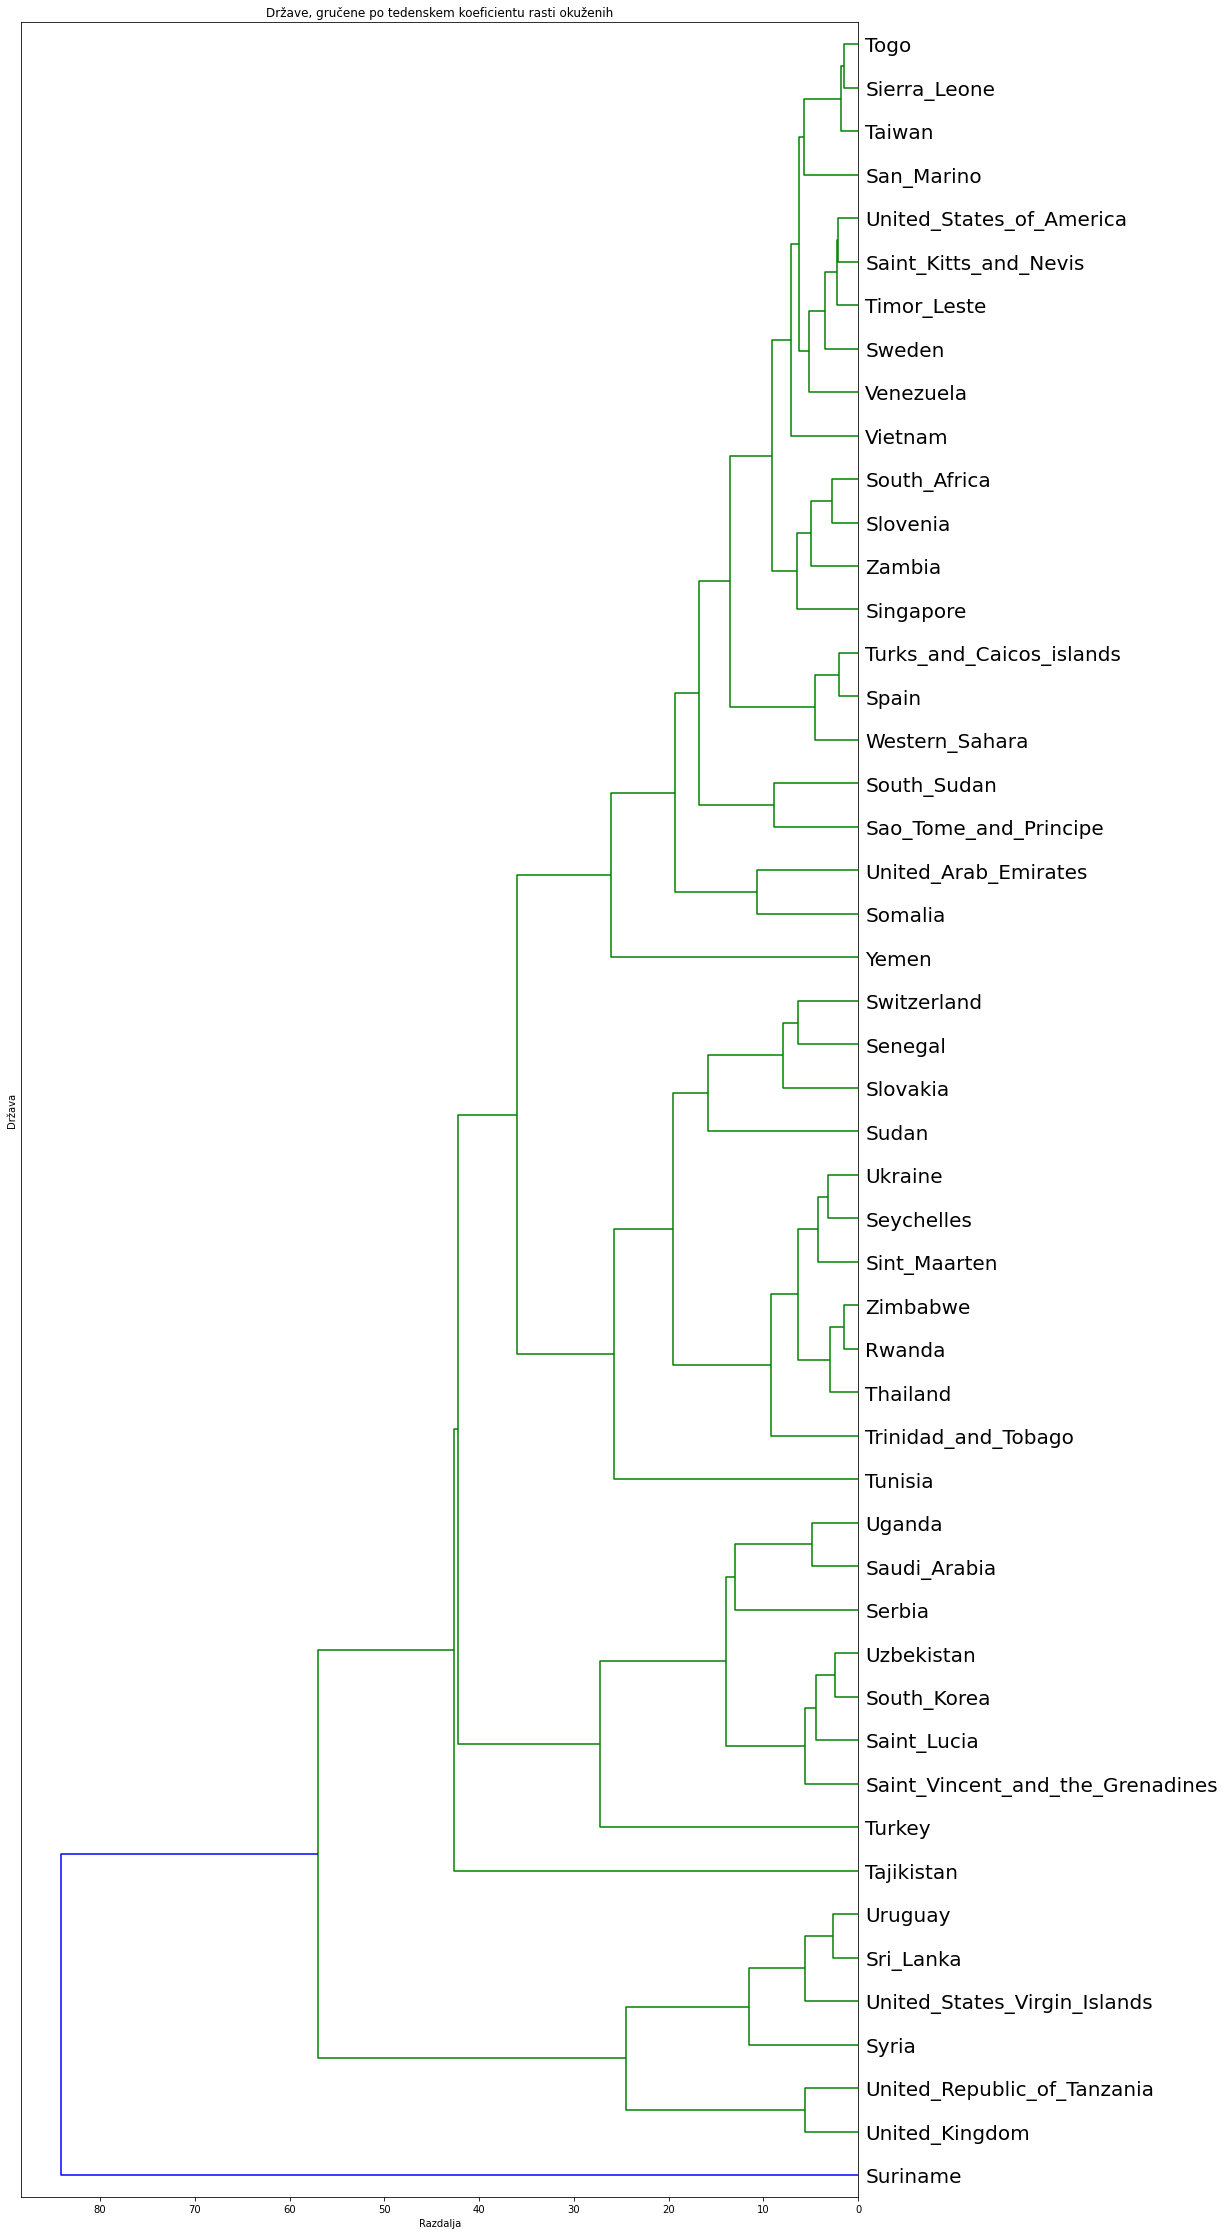

In [7]:
%matplotlib inline
jaka.drawDendrogram(caseLinkage, labels, title="Države, gručene po tedenskem koeficientu rasti okuženih")

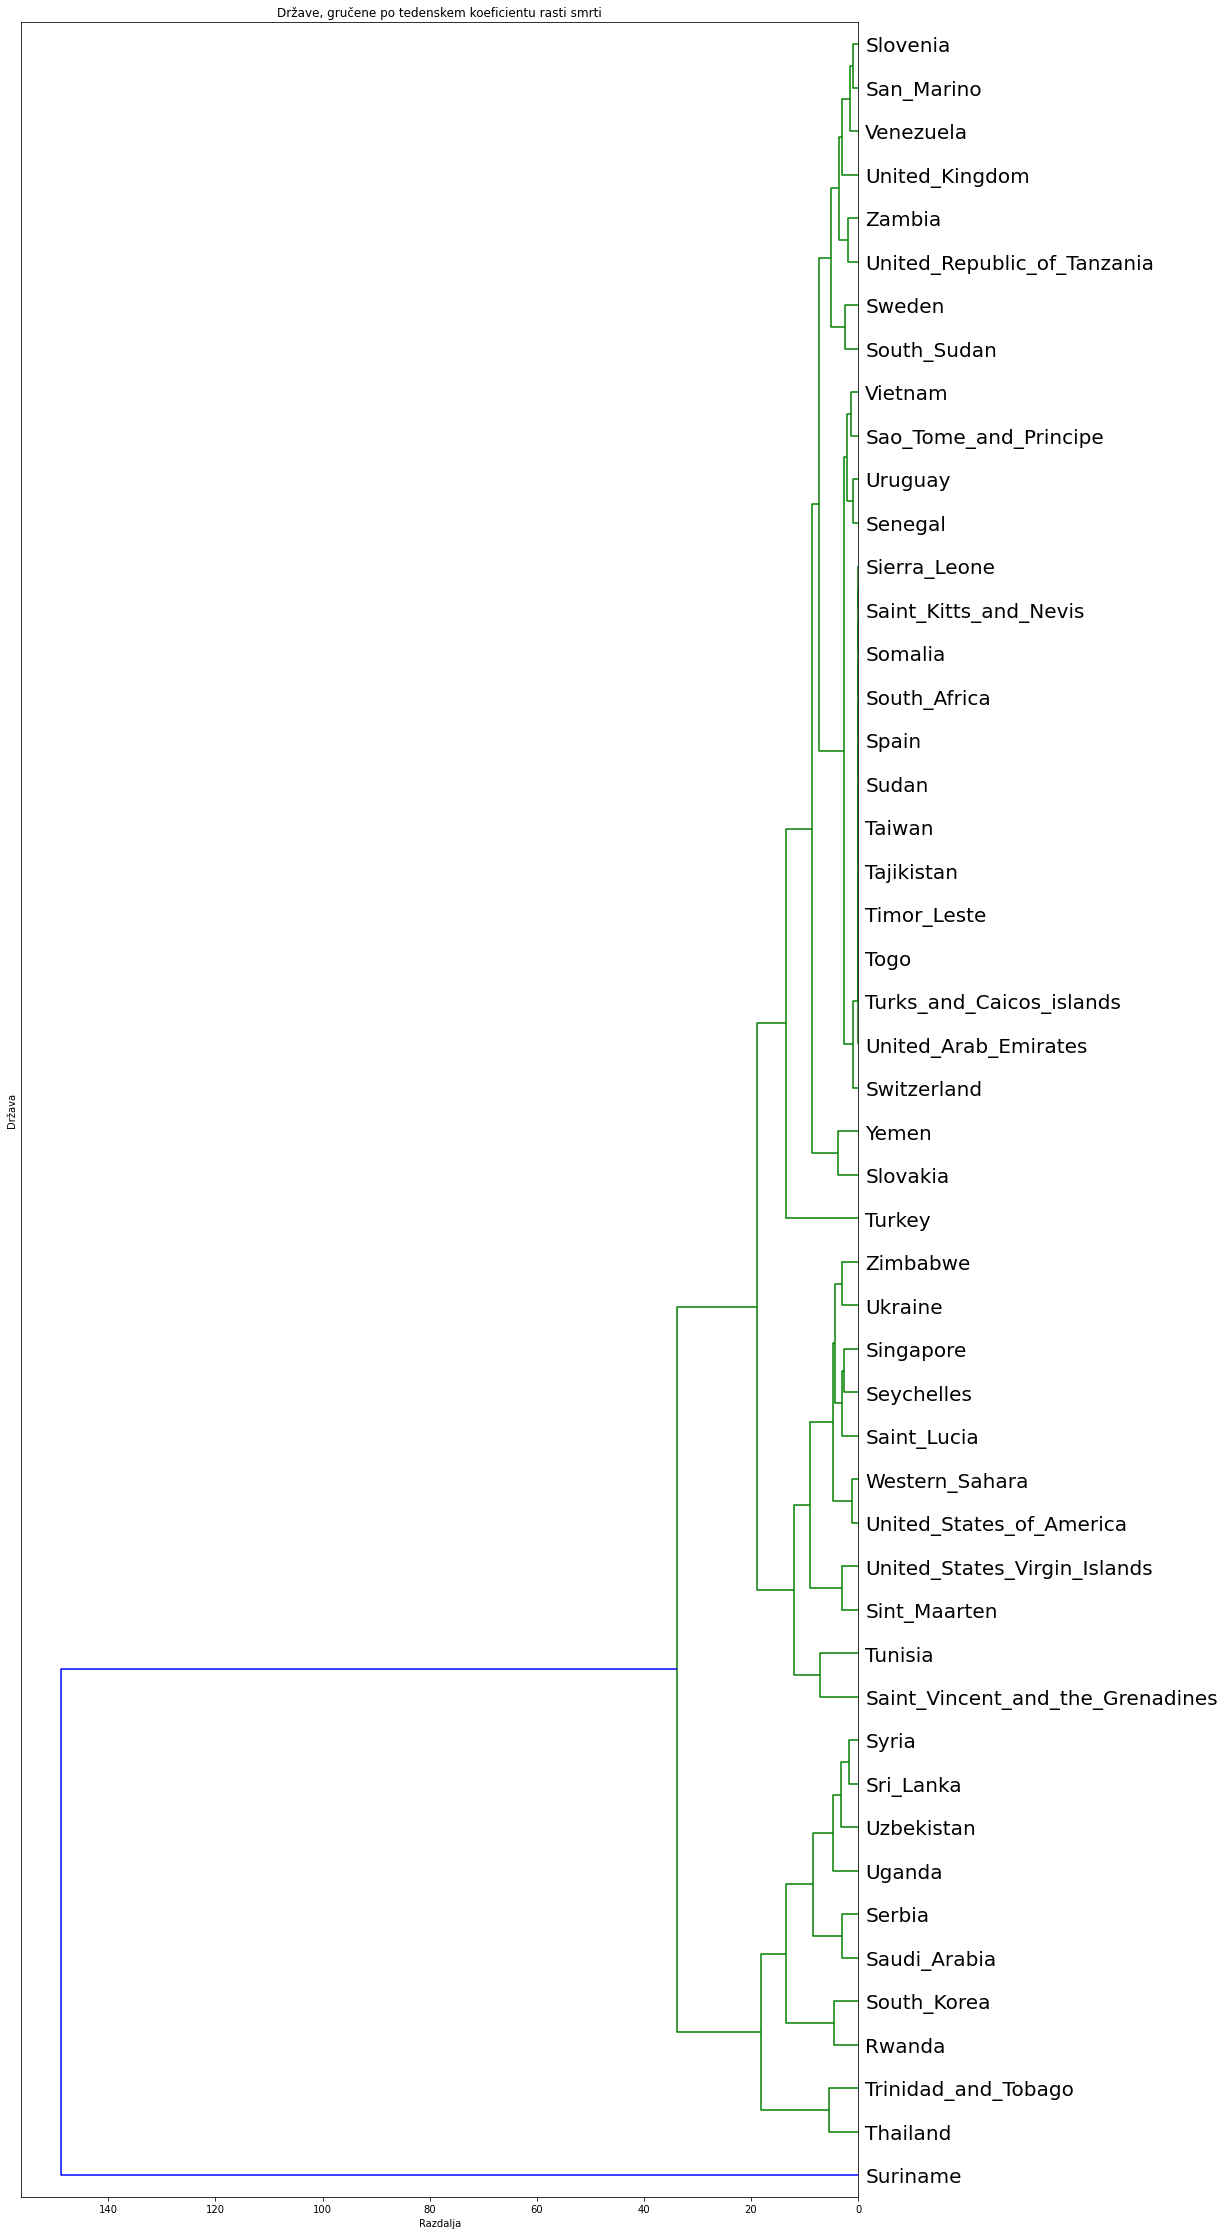

In [8]:
jaka.drawDendrogram(deathLinkage, labels, title="Države, gručene po tedenskem koeficientu rasti smrti")

## Gručenje držav glede na mesečno umrljivost

In [9]:
# Read total population data
(dataFrame, countryList) = jaka.readTotalPopulationData()

In [10]:
# Year months for later use
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [11]:
# Read the dataframe which contains deaths per month for year 2015
deathDataFrame = jaka.readDeathData(year=2015)

In [12]:
# Create a dictionary with country for key and array of deaths per each month per million eg. {"Slovenia": [2,3,5,2,4,2,4,5,3,2,4,5]}
monthDeathDict = jaka.createMonthDeathDictionary(deathDataFrame,dataFrame,countryList,months)

In [13]:
# Creating matrix and labels
(matrix, labels) = jaka.createMatrixAndLabels(monthDeathDict)

In [14]:
# Create a linkage
mortalityLinkage = jaka.createLinkage(matrix)

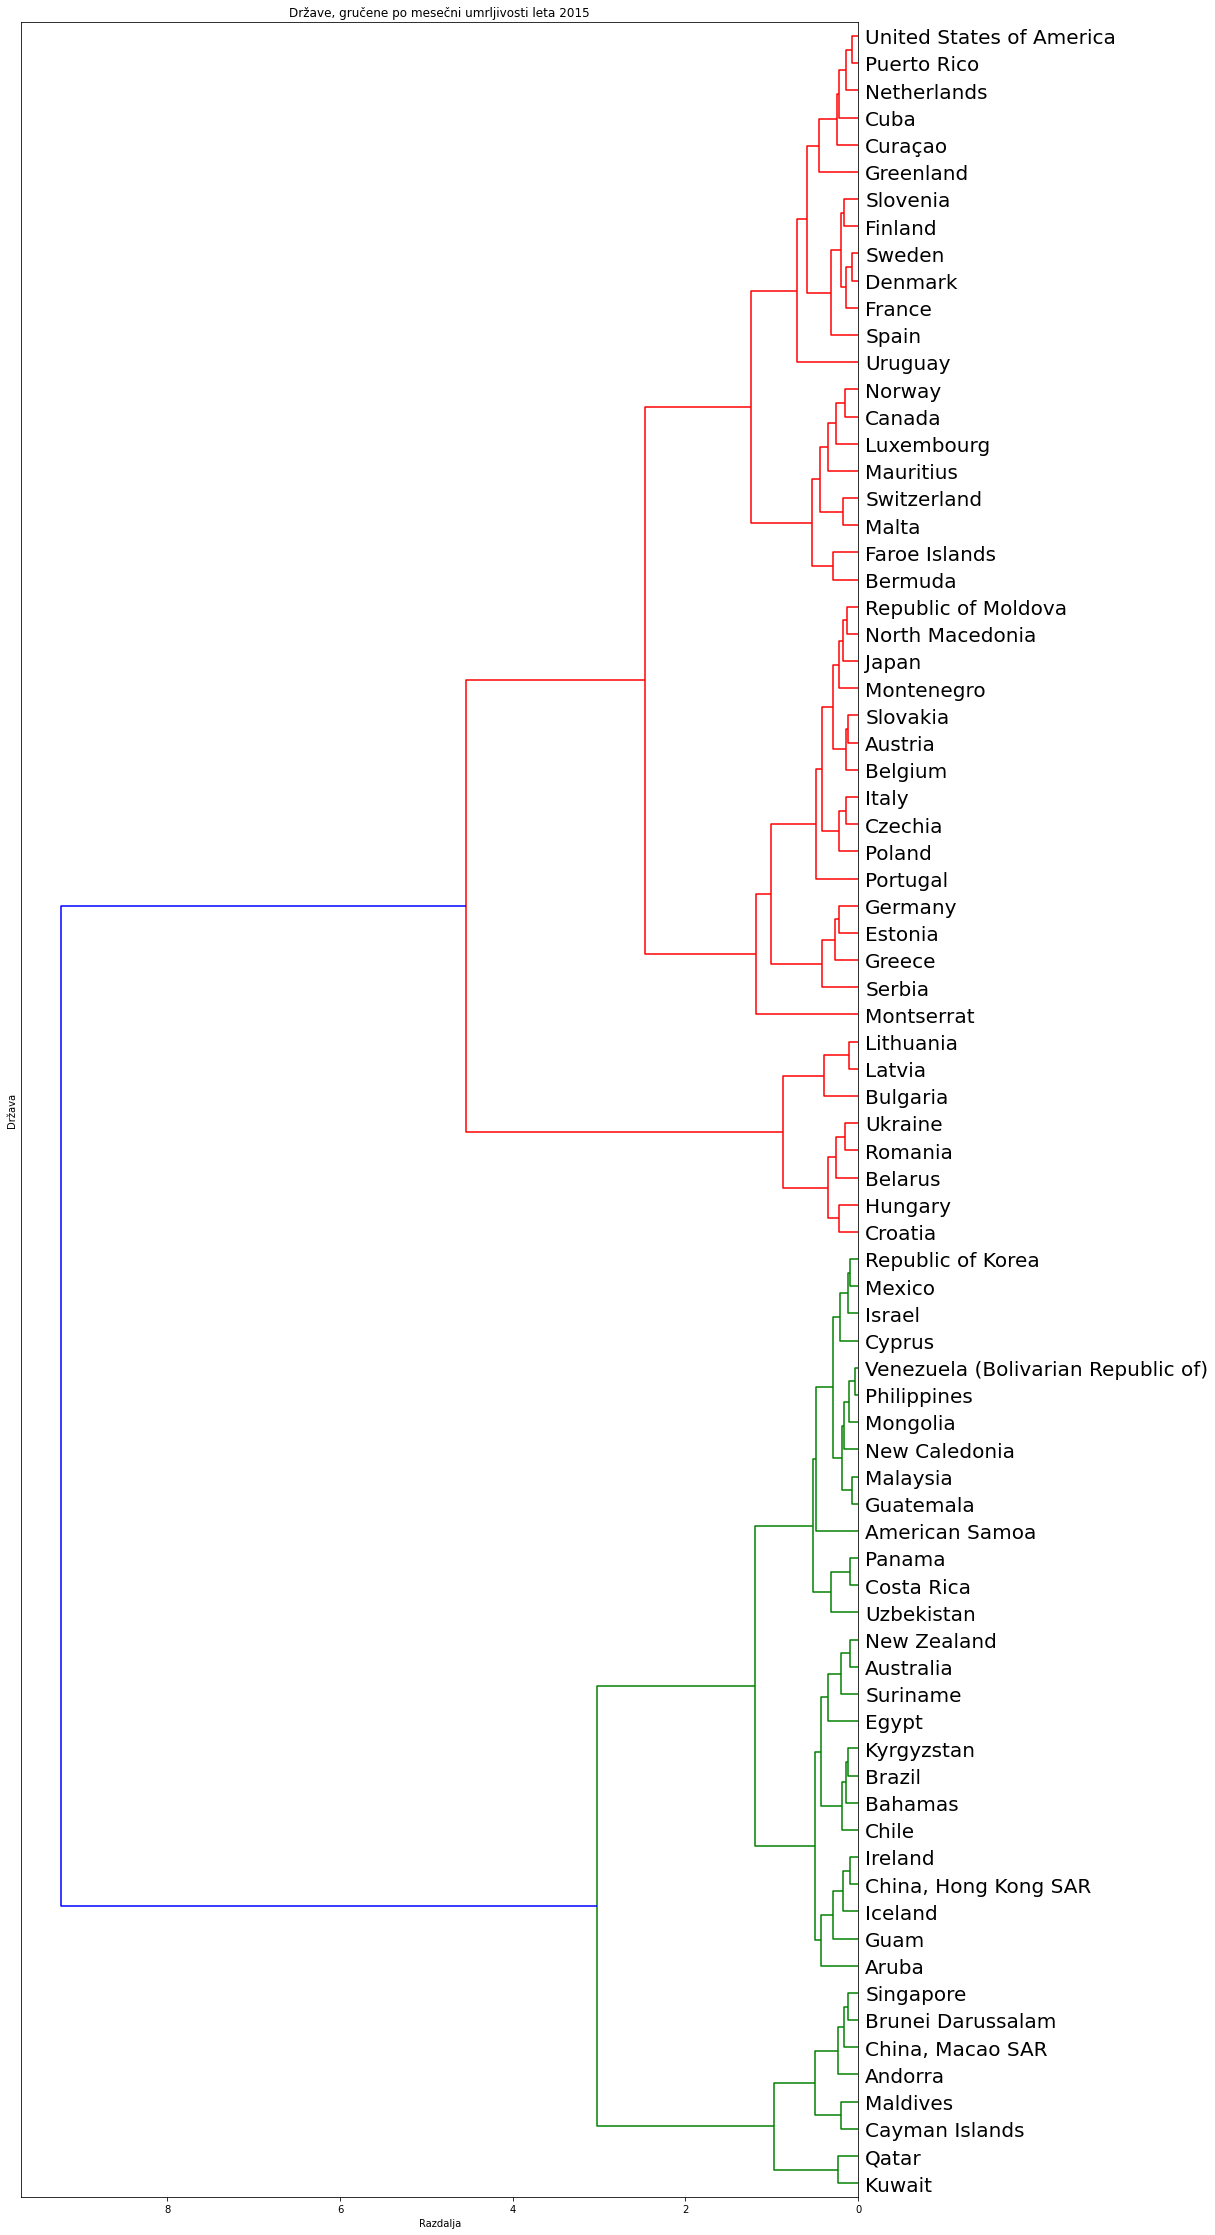

In [15]:
# Draw a dendrogram
jaka.drawDendrogram(mortalityLinkage, labels, title="Države, gručene po mesečni umrljivosti leta 2015")